In [1]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc,accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 

%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier, Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score,accuracy_score


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
import pickle

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Problem Description:

dataset is data from breast cancer patients with RNA data and clinical data


problem description: Use rna data to predict if patients die from breast cancer

In [2]:
df = pd.read_csv('../data/METABRIC_RNA_Mutation.csv')
mrna_df =pd.read_csv('../data/capstone2.mrn_df2.csv')

/var/folders/3k/vhmk7kx14ybb600l38fbqg780000gn/T/ipykernel_25223/962686654.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/METABRIC_RNA_Mutation.csv')


# EDA

1) explore column values and clean data
2) create death from cancer column
3) use that column as target

In [19]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.cancer_type_detailed.value_counts()

Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64

In [21]:
df.columns[:35]

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer', 'brca1', 'brca2', 'palb2', 'pten'],
      dtype='object')

In [22]:
df.tumor_other_histologic_subtype.value_counts()

Ductal/NST             1454
Mixed                   207
Lobular                 142
Medullary                25
Mucinous                 22
Tubular/ cribriform      21
Other                    17
Metaplastic               1
Name: tumor_other_histologic_subtype, dtype: int64

<Axes: >

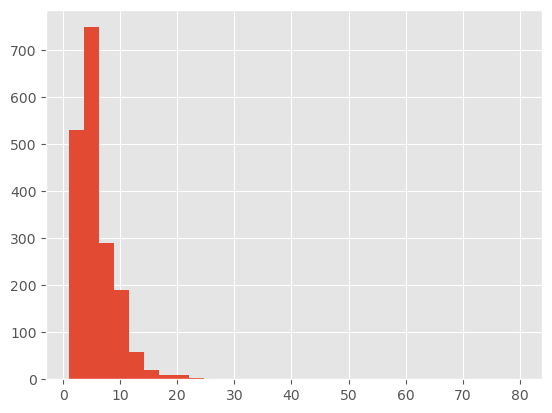

In [24]:
df.mutation_count.hist(bins = 30)

In [3]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)
mrna_df['death_from_cancer'] = df.death_from_cancer

In [4]:
mrna_df.death_from_cancer.fillna(0, inplace = True)

In [5]:
mrna_df = shuffle(mrna_df)

In [6]:
y = mrna_df.pop('death_from_cancer')
X = mrna_df

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)

In [26]:


logistic_regression_grid = {'Cs':[2,5,10, 25, 100, 200]
                       ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
                       ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1'] #, 'l2', 'elasticnet'
                           }
    



In [9]:
logistic_randomsearch = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')



In [27]:
logistic2_regression_grid = {'C':[0.0305,0.03055, 0.03060, 0.03065, 0.0307, 0.03075, 0.03077]
#                        ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
#                        ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1']} #, 'l2', 'elasticnet'

logistic2_gridsearch = GridSearchCV(LogisticRegression()
                                          ,logistic2_regression_grid
                                          ,n_jobs=-1
                                          ,verbose=False
                                          ,scoring='roc_auc')


logistic2_gridsearch.fit(X_train, y_train)
print(f"Best GRID logistic Parameters: {logistic2_gridsearch.best_params_}")
print(f"Best GRID logistic Model: {logistic2_gridsearch.best_estimator_}")
print(f"Best GRID logistic Score: {logistic2_gridsearch.best_score_:.4f}")

Best GRID logistic Parameters: {'C': 0.03077, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best GRID logistic Model: LogisticRegression(C=0.03077, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best GRID logistic Score: 0.6688


In [28]:
logistic_best_model = logistic2_gridsearch.best_estimator_
logistic_y_hats = logistic_best_model.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, logistic_y_hats):.4f}")




logistic2_gridsearch_best_model = logistic2_gridsearch.best_estimator_
logistic_y_hats = logistic_best_model.predict(X_test)
print(f"logistic gridsesarch ROC Score = {roc_auc_score(y_test, logistic_y_hats):.4f}")

Gradient ROC Score = 0.6109
logistic gridsesarch ROC Score = 0.6109


In [29]:
print(classification_report(y_test, logistic_y_hats))



              precision    recall  f1-score   support

         0.0       0.78      0.53      0.63       193
         1.0       0.42      0.69      0.52        93

    accuracy                           0.58       286
   macro avg       0.60      0.61      0.58       286
weighted avg       0.66      0.58      0.60       286



In [30]:
print(accuracy_score(y_test, logistic_y_hats))



0.583916083916084


In [31]:
# Plotting ROC Curve
def roc_curve_grapher(model, X_test ,y_test):
    """[Makes ROC curve graph given model and data]
    Args:
        model ([SKlearn classifer model]): [Logistic regression, Random Forrest, Gradient Boosting, etc]]
        X_test ([Pandas dataframe]): [Test feature data]
        y_test ([numpy array]): [target valudation data]
    """

    yhat = model.predict_proba(X_test)
    yhat = yhat[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, yhat)
    plt.plot([0,1], [0,1], linestyle='--', label='Random guess')
    plt.plot(fpr, tpr, marker='.', label=f'Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.suptitle('Model ROC curve', fontsize=20)
    plt.legend()
    # plt.savefig("Logistic Regression_ROC_curve.png", dpi=200)
    plt.show()

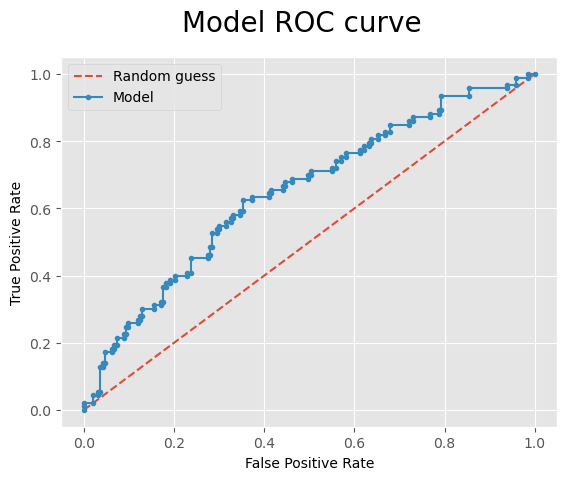

In [32]:
# Plotting ROC Curve

logistic2_gridsearch_best_model
roc_curve_grapher(logistic2_gridsearch_best_model, X_test, y_test)